<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/binary_classification_with_single_neuron_single_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#
# Create a dataset
#

#
# We first want to create a balanced dataset (examples in both classes are 
# grouped together, there are two clearly distinguishable clusters)
#

dataset_xa = np.linspace(1, 2, 50)
dataset_ya = np.full(50, 0)

dataset_xb = np.linspace(2.5, 3.5, 50)
dataset_yb = np.full(50, 1)

dataset_x = np.concatenate((dataset_xa, dataset_xb))
dataset_y = np.concatenate((dataset_ya, dataset_yb))

In [39]:
def plot_dataset(dataset_x, dataset_y):
  plt.plot(dataset_x, dataset_y, 'bo', label='data')
  plt.xlim([0.5, 8])
  plt.ylim([-0.25, 1.225])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc = 'lower right')
  plt.show()

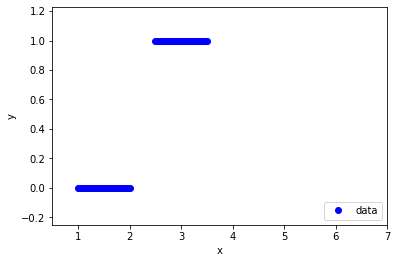

In [4]:
#
# (Optional)
# Plot data points
#

plot_dataset(dataset_x, dataset_y)

In [34]:
def split(dataset_x, dataset_y):
  dataset = list(zip(dataset_x, dataset_y))
  print(f'dataset = {dataset}') # list of (x, y) tuples

  df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

  dataset_train = df_dataset.sample(frac=0.8, random_state=0)
  print(f'dataset_train.shape = {dataset_train.shape}')
  dataset_test = df_dataset.drop(dataset_train.index)
  print(f'dataset_test.shape = {dataset_test.shape}')
  return (dataset_train, dataset_test)

In [5]:
#
# Create a training and test datasets
#

dataset_train, dataset_test = split(dataset_x, dataset_y)

dataset = [(1.0, 0), (1.0204081632653061, 0), (1.0408163265306123, 0), (1.0612244897959184, 0), (1.0816326530612246, 0), (1.1020408163265305, 0), (1.1224489795918366, 0), (1.1428571428571428, 0), (1.163265306122449, 0), (1.183673469387755, 0), (1.2040816326530612, 0), (1.2244897959183674, 0), (1.2448979591836735, 0), (1.2653061224489797, 0), (1.2857142857142856, 0), (1.3061224489795917, 0), (1.3265306122448979, 0), (1.346938775510204, 0), (1.3673469387755102, 0), (1.3877551020408163, 0), (1.4081632653061225, 0), (1.4285714285714286, 0), (1.4489795918367347, 0), (1.4693877551020407, 0), (1.489795918367347, 0), (1.510204081632653, 0), (1.530612244897959, 0), (1.5510204081632653, 0), (1.5714285714285714, 0), (1.5918367346938775, 0), (1.6122448979591835, 0), (1.6326530612244898, 0), (1.6530612244897958, 0), (1.6734693877551021, 0), (1.693877551020408, 0), (1.7142857142857142, 0), (1.7346938775510203, 0), (1.7551020408163265, 0), (1.7755102040816326, 0), (1.7959183673469385, 0), (1.81632653

In [6]:
#
# Build a model with a single neuron which has a single input
# a(x) = kx + b
#
ACTIVATION = None

model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=ACTIVATION),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
#
# Compile the model
#

LEARNING_RATE = 0.01
OPTIMIZER = tf.optimizers.Adam(learning_rate=LEARNING_RATE)
LOSS = tf.losses.MeanSquaredError()

model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=[tf.metrics.BinaryAccuracy()])

In [8]:
#
# Train the model
#

%%time
EPOCHS = 100

history = model.fit(
    dataset_train['x'], dataset_train['y'],
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 1.87 s, sys: 108 ms, total: 1.98 s
Wall time: 2.7 s


In [9]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,binary_accuracy,val_loss,val_binary_accuracy,epoch
95,0.036389,1.0,0.024397,1.0,95
96,0.036384,1.0,0.024388,1.0,96
97,0.036377,1.0,0.024397,1.0,97
98,0.036378,1.0,0.024378,1.0,98
99,0.036366,1.0,0.024384,1.0,99


In [16]:
#
# Plot how loss changes over each epoch.
#

def plot_loss(history):
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='test loss')
  plt.title('Model loss')
  plt.ylabel('Loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.show()

  plt.plot(history.history['binary_accuracy'])
  plt.plot(history.history['val_binary_accuracy'])
  plt.title('Model loss')
  plt.ylabel('Binary Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.grid(True)
  plt.show()

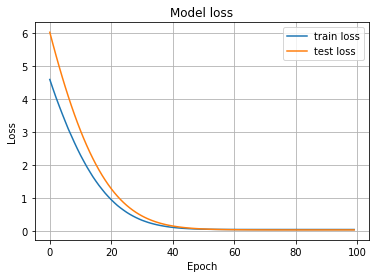

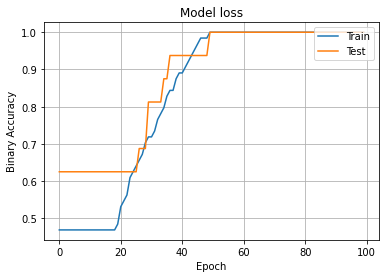

In [17]:
plot_loss(history)

In [45]:
def plot_predictions(x, y):
  # plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(dataset_train['x'], dataset_train['y'], 'bo', label='data')
  plt.plot(x, y, color='k', label='y=kx+b')
  plt.axhline(y=0.5, color='r', linestyle='dotted', label='y=0.5')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim([0.5, 7])
  plt.ylim([-0.25, 1.225])
  plt.legend(loc = 'lower right')
  plt.show()

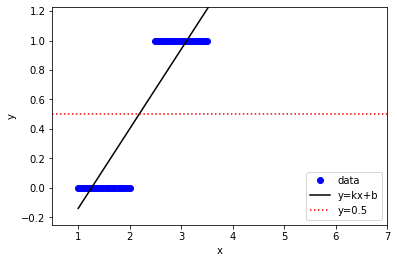

[array([[0.5400346]], dtype=float32), array([-0.6787664], dtype=float32)]


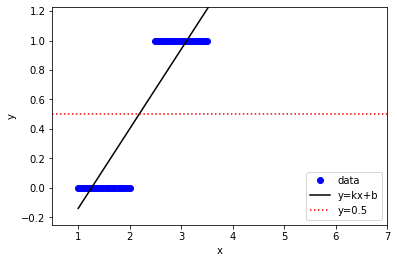

In [25]:
# 
# Plot the final function approximation
#

x = np.linspace(1, 4, 300)
y = model.predict(x)
plot_preditions(x, y)

#
# We can also get the trained weights from the network and use them as
# coefficients in our linear equation to get the predictions:
#

weights = model.layers[0].get_weights()
print(weights)
learned_coefficient = weights[0][0]
learned_bias = weights[1][0]

y = learned_coefficient * x + learned_bias
plot_predictions(x, y)

In [37]:
#
# Create a dataset
#

#
# We now want to create an unbalanced dataset (examples in one class are not 
# grouped close together but they form their own clusters)
#

# We can simply expand the existing dataset.

dataset_xc = np.linspace(5.5, 7.5, 100)
dataset_yc = np.full(100, 1)

dataset_x = np.concatenate((dataset_xa, dataset_xb, dataset_xc))
dataset_y = np.concatenate((dataset_ya, dataset_yb, dataset_yc))

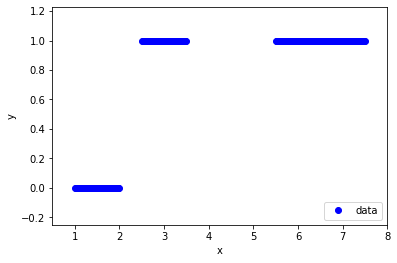

In [40]:
plot_dataset(dataset_x, dataset_y)

In [41]:
dataset_train, dataset_test = split(dataset_x, dataset_y)

dataset = [(1.0, 0), (1.0204081632653061, 0), (1.0408163265306123, 0), (1.0612244897959184, 0), (1.0816326530612246, 0), (1.1020408163265305, 0), (1.1224489795918366, 0), (1.1428571428571428, 0), (1.163265306122449, 0), (1.183673469387755, 0), (1.2040816326530612, 0), (1.2244897959183674, 0), (1.2448979591836735, 0), (1.2653061224489797, 0), (1.2857142857142856, 0), (1.3061224489795917, 0), (1.3265306122448979, 0), (1.346938775510204, 0), (1.3673469387755102, 0), (1.3877551020408163, 0), (1.4081632653061225, 0), (1.4285714285714286, 0), (1.4489795918367347, 0), (1.4693877551020407, 0), (1.489795918367347, 0), (1.510204081632653, 0), (1.530612244897959, 0), (1.5510204081632653, 0), (1.5714285714285714, 0), (1.5918367346938775, 0), (1.6122448979591835, 0), (1.6326530612244898, 0), (1.6530612244897958, 0), (1.6734693877551021, 0), (1.693877551020408, 0), (1.7142857142857142, 0), (1.7346938775510203, 0), (1.7551020408163265, 0), (1.7755102040816326, 0), (1.7959183673469385, 0), (1.81632653

In [42]:
#
# Train the (same) model
#

# We first need to reset it
model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=[tf.metrics.BinaryAccuracy()])

EPOCHS = 100

history = model.fit(
    dataset_train['x'], dataset_train['y'],
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

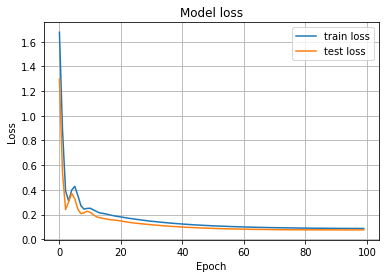

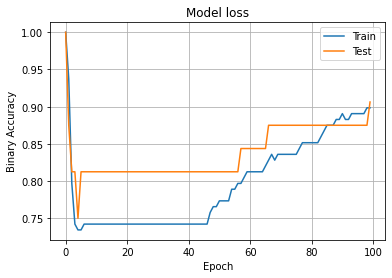

In [43]:
plot_loss(history)

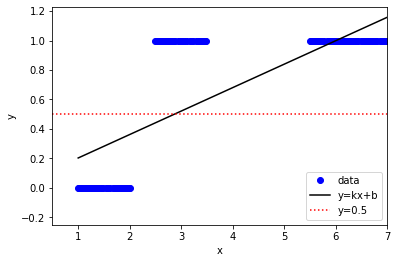

In [47]:
# 
# Plot the final function approximation
#

x = np.linspace(1, 8, 350)
y = model.predict(x)
plot_predictions(x, y)

In [48]:
#
# model with a single neuron which has a single input
# a(x) = kx + b
#

ACTIVATION = tf.nn.sigmoid

model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=ACTIVATION), 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [57]:
#
# Compile the model
#

LEARNING_RATE = 0.01
OPTIMIZER = tf.optimizers.Adam(learning_rate=LEARNING_RATE)
LOSS = tf.losses.BinaryCrossentropy()

model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=[tf.metrics.BinaryAccuracy()])

In [58]:
#
# Train the model
#

EPOCHS = 1000

history = model.fit(
    dataset_train['x'], dataset_train['y'],
    epochs=EPOCHS,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [60]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


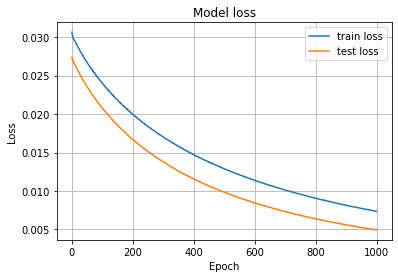

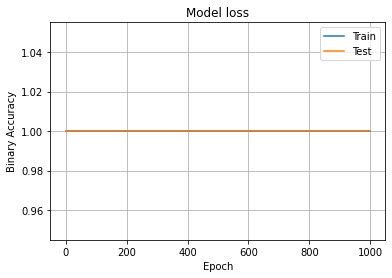

In [61]:
plot_loss(history)

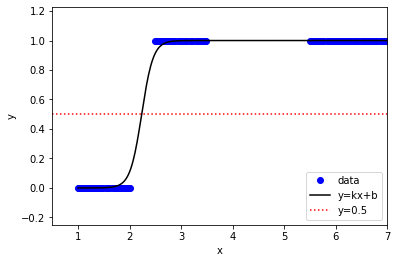

In [62]:
y = model.predict(x)
plot_predictions(x, y)

In [ ]:
#
#
# Code below is experimental - do not use
#
#

In [62]:
# model with a single neuron which has a single input
# a(x) = kx + b
activation_1 = None
activation_2 = tf.nn.sigmoid

num_of_classes = 2 # 0 and 1
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=activation_1), 
    layers.Dense(units=num_of_classes, activation=activation_2),
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


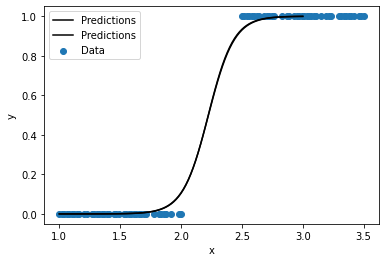

In [63]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

# loss = 'binary_crossentropy'
loss = 'mean_squared_error'

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['binary_accuracy'])

# %%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


x = np.linspace(1, 3, 101)
y = model.predict(x)

plot_fn(x,y)

In [64]:
# model with a single neuron which has a single input
# a(x) = kx + b
activation_1 = tf.nn.sigmoid
activation_2 = tf.nn.sigmoid

num_of_classes = 2 # 0 and 1
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=activation_1), 
    layers.Dense(units=num_of_classes, activation=activation_2),
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


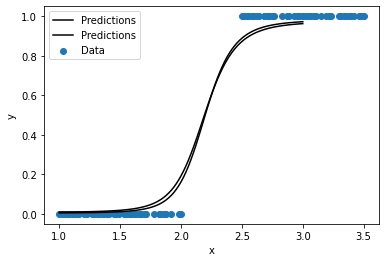

In [65]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

# loss = 'binary_crossentropy'
loss = 'mean_squared_error'

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['binary_accuracy'])

# %%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


x = np.linspace(1, 3, 101)
y = model.predict(x)

plot_fn(x,y)